In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('./data/311_calls_Take2.csv')

/var/folders/b3/cjvms6c10k77tgv6k_rw3jbh0000gn/T/ipykernel_21304/843287326.py:4: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/311_calls_Take2.csv')


In [24]:
df = df[df['Borough'] == 'MANHATTAN'].copy()

In [25]:
df = df[['Complaint Type', 'Incident Zip', 'Latitude', 'Longitude']].copy()

In [26]:
df.head()

,Complaint Type,Incident Zip,Latitude,Longitude
2,Sidewalk Condition,10032.0,40.833931,-73.942611
12,Damaged Tree,10016.0,40.745058,-73.978606
13,Non-Residential Heat,10016.0,40.741129,-73.975021
14,Non-Residential Heat,10036.0,40.757103,-73.986193
22,Sidewalk Condition,10019.0,40.762307,-73.984178


In [27]:
df.dropna(how='any', inplace=True)

In [28]:
df['Complaint Type'].unique()

array(['Sidewalk Condition', 'Damaged Tree', 'Non-Residential Heat',
       'DOOR/WINDOW', 'Noise - Vehicle', 'ELECTRIC', 'FLOORING/STAIRS',
       'Noise', 'GENERAL', 'Street Condition', 'Water System',
       'HEAT/HOT WATER', 'Illegal Parking', 'Taxi Complaint',
       'Dirty Conditions', 'APPLIANCE', 'Noise - Residential',
       'Homeless Person Assistance', 'PAINT/PLASTER', 'PLUMBING',
       'UNSANITARY CONDITION', 'Taxi Report', 'Plumbing',
       'Request Large Bulky Item Collection', 'Noise - Commercial',
       'Noise - Street/Sidewalk', 'Sanitation Condition',
       'Broken Muni Meter', 'LinkNYC', 'WATER LEAK',
       'Broken Parking Meter', 'Street Sign - Damaged', 'Building/Use',
       'General Construction/Plumbing',
       'Special Projects Inspection Team (SPIT)', 'Air Quality', 'Sewer',
       'Panhandling', 'ELEVATOR', 'Food Establishment', 'Electrical',
       'Graffiti', 'Drug Activity', 'Street Light Condition',
       'Consumer Complaint', 'Rodent', 'Other Enfo

In [29]:
df['Complaint Type'].value_counts()[:5]

Complaint Type
HEAT/HOT WATER             27456
Noise - Residential        20689
Noise                      10845
Noise - Street/Sidewalk     7968
Noise - Commercial          7390
Name: count, dtype: int64

In [30]:
df = df[df['Complaint Type'].isin(df['Complaint Type'].value_counts()[:5].keys())]

In [31]:
df.shape

(74348, 4)

In [32]:
df.head()

,Complaint Type,Incident Zip,Latitude,Longitude
56,Noise,10003.0,40.732993,-73.990564
97,HEAT/HOT WATER,10026.0,40.806640,-73.953735
103,HEAT/HOT WATER,10128.0,40.781290,-73.948036
108,HEAT/HOT WATER,10026.0,40.801207,-73.952550
109,HEAT/HOT WATER,10032.0,40.839391,-73.943368


In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['target'] = le.fit_transform(df['Complaint Type'])

In [34]:
df.head()

,Complaint Type,Incident Zip,Latitude,Longitude,target
56,Noise,10003.0,40.732993,-73.990564,1
97,HEAT/HOT WATER,10026.0,40.806640,-73.953735,0
103,HEAT/HOT WATER,10128.0,40.781290,-73.948036,0
108,HEAT/HOT WATER,10026.0,40.801207,-73.952550,0
109,HEAT/HOT WATER,10032.0,40.839391,-73.943368,0


In [35]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
X = df[['Incident Zip', 'Latitude', 'Longitude', 'target']].copy()

In [36]:
X['cluster'] = kmeans.fit_predict(X)

In [37]:
X.head()

,Incident Zip,Latitude,Longitude,target,cluster
56,10003.0,40.732993,-73.990564,1,2
97,10026.0,40.806640,-73.953735,0,0
103,10128.0,40.781290,-73.948036,0,3
108,10026.0,40.801207,-73.952550,0,0
109,10032.0,40.839391,-73.943368,0,0


In [38]:
X['cluster'] = X['cluster'].astype('category')

In [39]:
import seaborn as sns

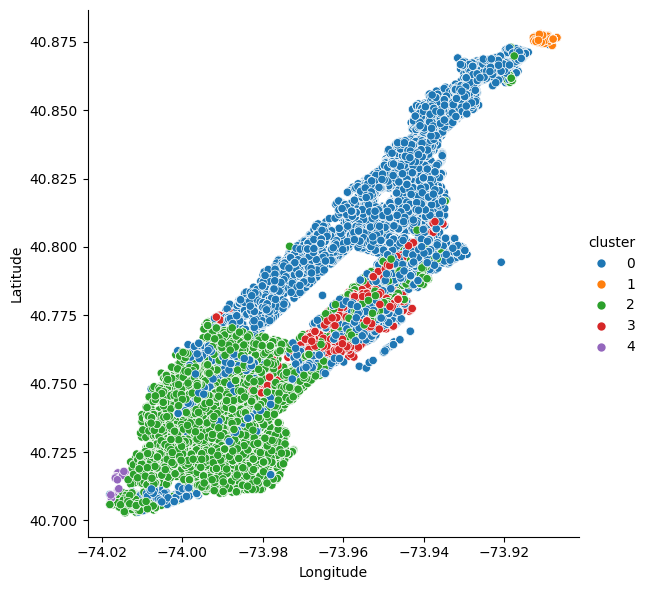

In [40]:
sns.relplot(x='Longitude', y='Latitude', hue='cluster', data=X, height=6)

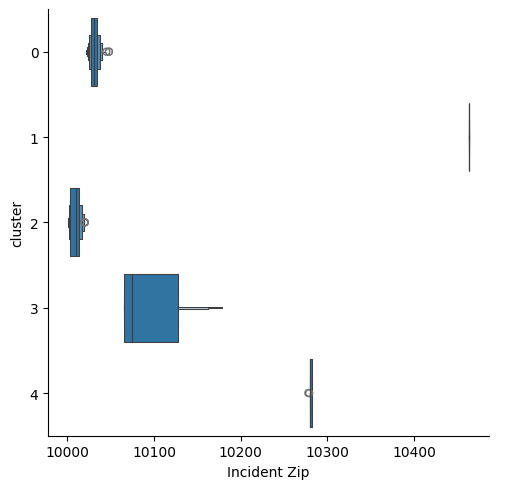

In [41]:
sns.catplot(x='Incident Zip', y='cluster', data=X, kind='boxen', height=5)

In [42]:
X = df[['Incident Zip', 'Latitude', 'Longitude', 'target']].copy()

In [43]:
kmeans_kwargs = {
    'init': 'random',
    'n_init': 10,
    'max_iter': 300,
    'random_state': 42
}

In [44]:
sse = []

for k in range(1,6):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

Text(0, 0.5, 'SSE')

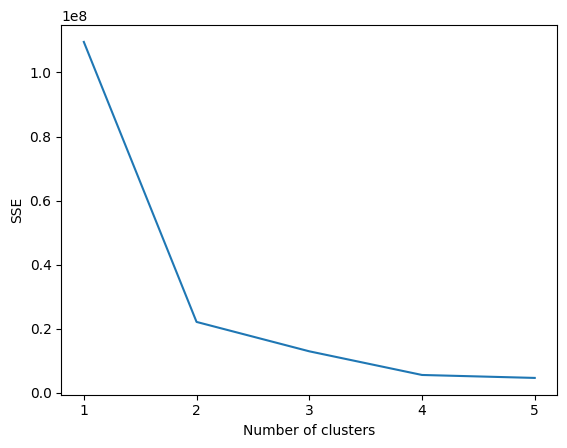

In [45]:
plt.plot(range(1,6), sse)
plt.xticks(range(1, 6))
plt.xlabel('Number of clusters')
plt.ylabel('SSE')